## Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [2]:
# Create a path

path = r'C:\Users\Owner\Desktop\Data Analyst\Achievement 6'

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_new.csv'))

In [4]:
df.shape

(86512, 12)

In [5]:
df.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [6]:
df1 = df.drop(columns = ['country','total_vaccinations','people_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million' , 'vaccines'])

In [7]:
df1

,date,people_fully_vaccinated
0,2021-02-22,0.0
1,2021-02-23,0.0
2,2021-02-24,0.0
3,2021-02-25,0.0
4,2021-02-26,0.0
...,...,...
86507,2022-03-25,3473523.0
86508,2022-03-26,3487962.0
86509,2022-03-27,3493763.0
86510,2022-03-28,3501493.0


In [8]:
df2 = df1.reset_index()

In [9]:
df_sub = df2.loc[(df2['date'] >= '2020-01-01') & (df2['date'] < '2022-04-01')]

In [10]:
# Set the "date" column as the index

from datetime import datetime

df_sub['datetime'] = pd.to_datetime(df_sub['date']) 
df_sub = df_sub.set_index('datetime') 
df_sub.drop(['date'], axis=1, inplace=True) 
df_sub.head()

,index,people_fully_vaccinated
datetime,,
2021-02-22,0,0.0
2021-02-23,1,0.0
2021-02-24,2,0.0
2021-02-25,3,0.0
2021-02-26,4,0.0


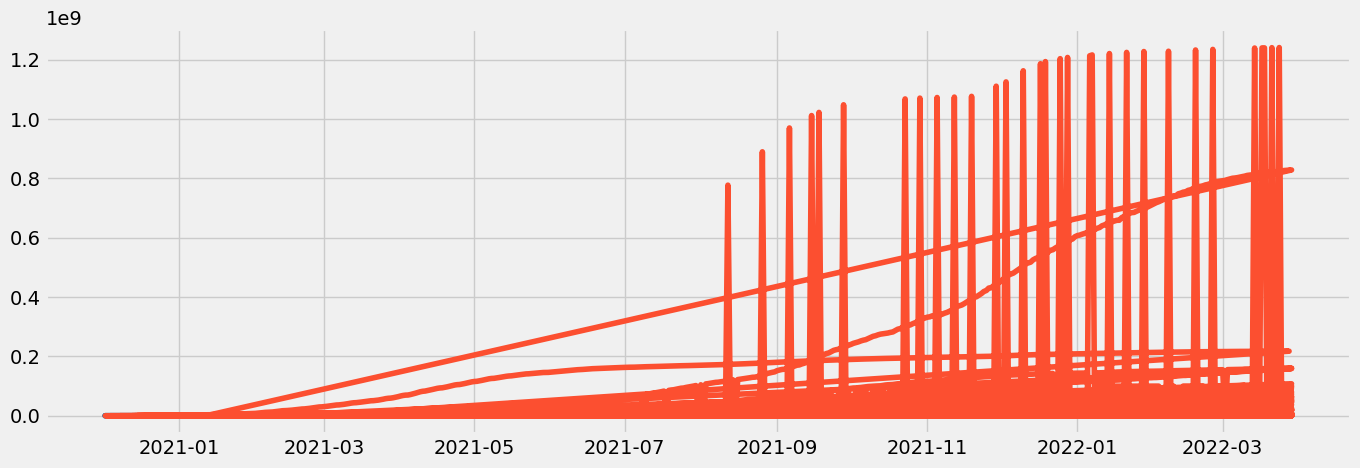

In [11]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

In [12]:
# Creating a new dataframe with 'people_fully_vaccinated' grouped by dates

df_new = df_sub.groupby('datetime').agg({'people_fully_vaccinated': ['mean']})

In [13]:
df_new.head()

,people_fully_vaccinated
,mean
datetime,
2020-12-02,0.0
2020-12-03,0.0
2020-12-04,0.0
2020-12-05,0.0
2020-12-06,0.0


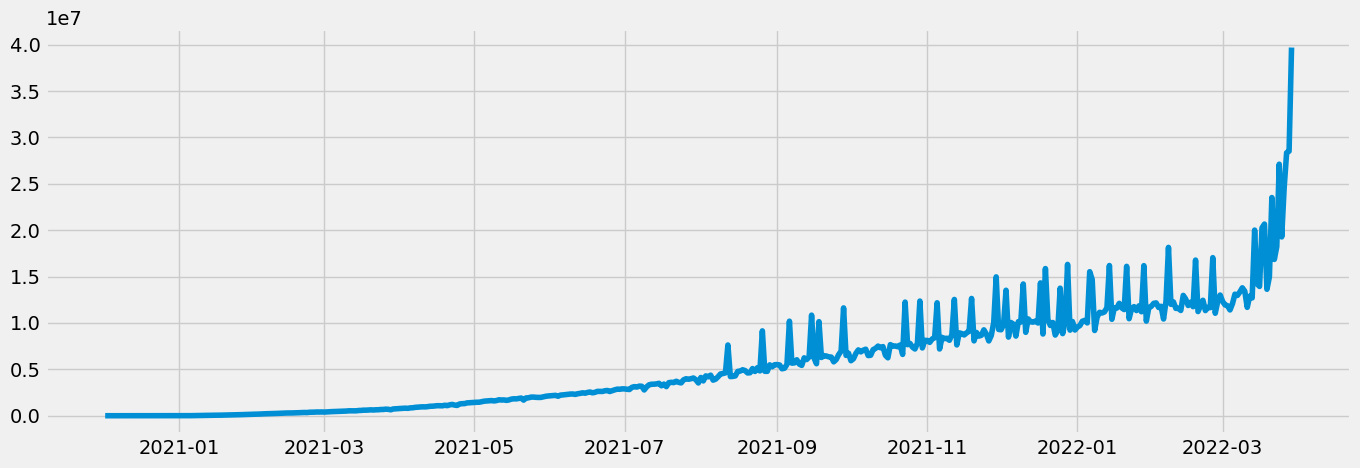

In [14]:
# Plotting the data using matplotlib

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_new)

### Time-series analysis: decomposition

In [15]:
# Decompose time series using multiplicative model
decomposition = sm.tsa.seasonal_decompose(df_new, model='additive')

In [16]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

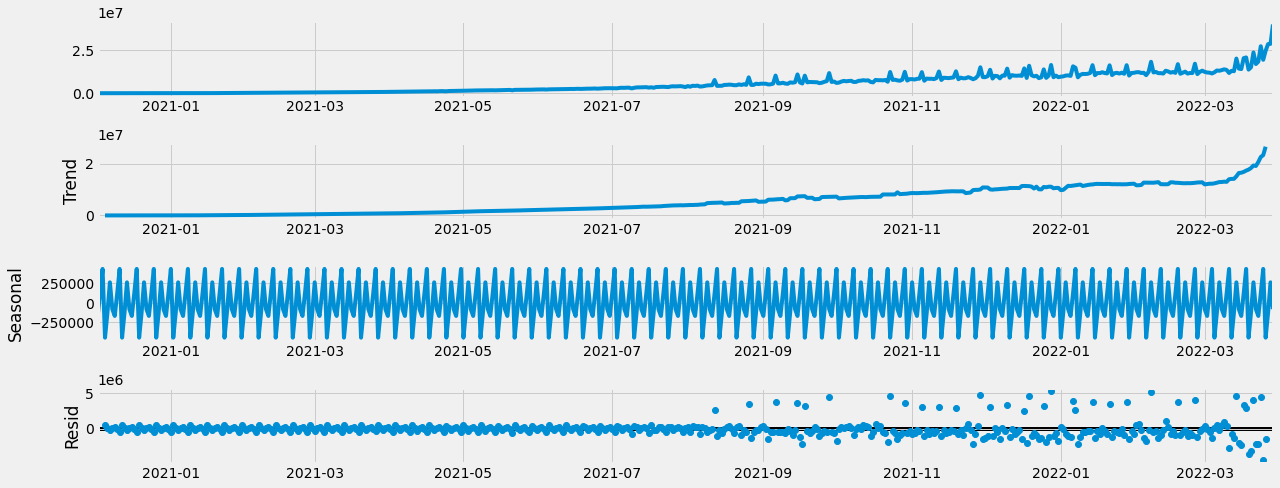

In [17]:
# Plot the separate components

decomposition.plot()
plt.show()

###  Testing for stationarity

In [18]:
# Importing the adfuller() function

from statsmodels.tsa.stattools import adfuller 

# Performing the Dickey-Fuller test:

def dickey_fuller(timeseries): # Define the function
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_new['people_fully_vaccinated'])

Dickey-Fuller Stationarity test:
Test Statistic                   0.923765
p-value                          0.993393
Number of Lags Used             18.000000
Number of Observations Used    464.000000
Critical Value (1%)             -3.444522
Critical Value (5%)             -2.867789
Critical Value (10%)            -2.570099
dtype: float64


### Autocorrelation Test

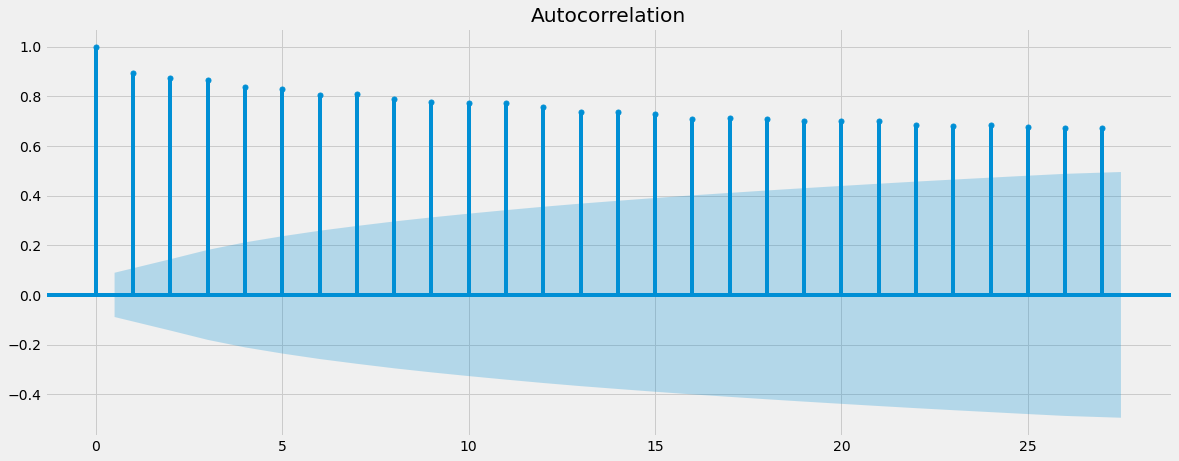

In [19]:
# Checking plot of autocorrelation

# Importing the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_new)
plt.show()

###  Stationarizing Data

In [20]:
# Conducting the first round of differencing by subtracting the previous data point from the current data point
# The df.shift(1) function turns the observation to t-1, making the whole data t - (t -1)

data_diff = df_new - df_new.shift(1)

In [21]:
# Removing missing values as a result of differencing

data_diff.dropna(inplace = True)

In [22]:
# Checking values and headers

data_diff.head()

,people_fully_vaccinated
,mean
datetime,
2020-12-03,0.0
2020-12-04,0.0
2020-12-05,0.0
2020-12-06,0.0
2020-12-07,0.0


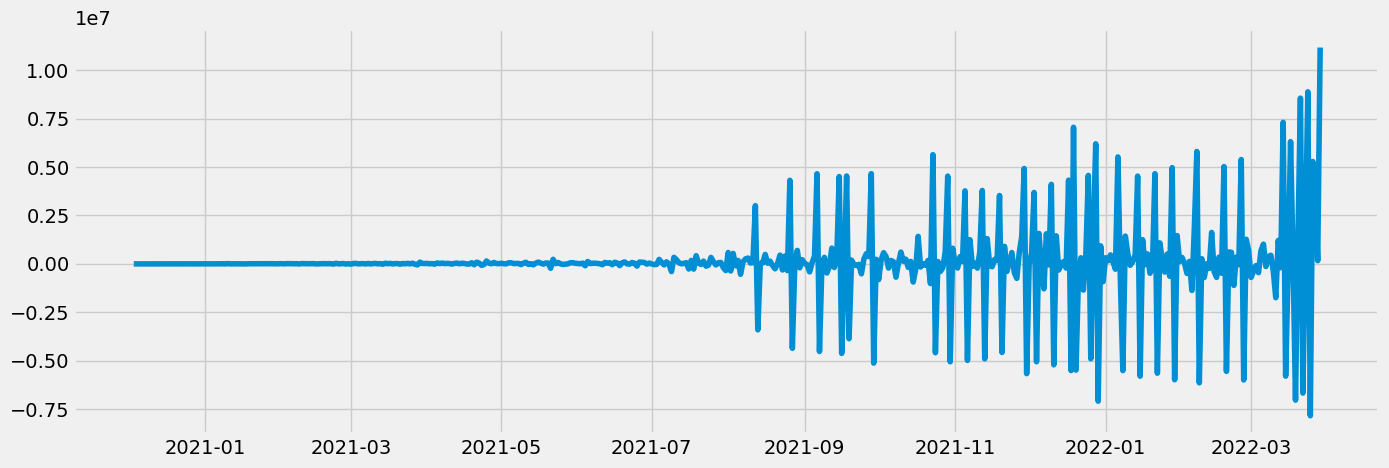

In [23]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [24]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                   5.605398
p-value                          1.000000
Number of Lags Used             17.000000
Number of Observations Used    464.000000
Critical Value (1%)             -3.444522
Critical Value (5%)             -2.867789
Critical Value (10%)            -2.570099
dtype: float64


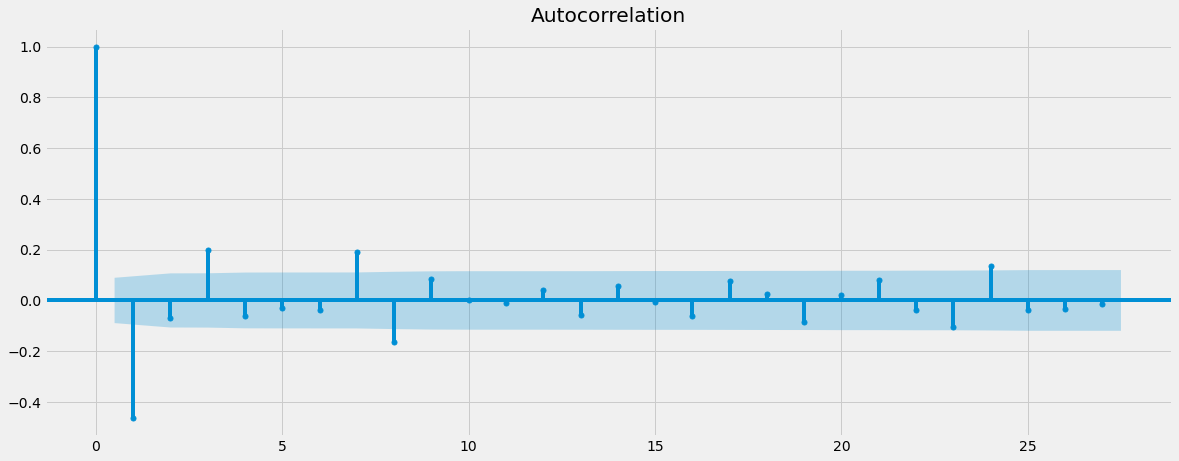

In [25]:
plot_acf(data_diff)
plt.show()

### The autocorrelation plot has improved. The stationary is strong due to no vertical lines going above the confidence interval.

## I did the above analysis to understand the concept. However, I dont think I can use this for my project